# Imports

In [5]:
import tensorflow as tf
import os

## limit memory growth


In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [20]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [2]:
data_dir = 'data'

In [12]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [14]:
os.listdir(data_dir)

['happy', 'sad']

In [24]:
os.listdir(data_dir)

['happy', '.DS_Store', 'sad']

In [26]:
for image_class in os.listdir(data_dir):
    image_class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(image_class_path):  
        for image in os.listdir(image_class_path):
            image_path = os.path.join(image_class_path, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print("image not extension")
                    os.remove(image_path)
            except Exception as e:
                print("issue w/ image:", e)

In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 168 files belonging to 2 classes.


In [32]:
data_iterator = data.as_numpy_iterator()

In [33]:
batch = data_iterator.next()

In [37]:
# 1 = sad, 0 = sad
batch[1]

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

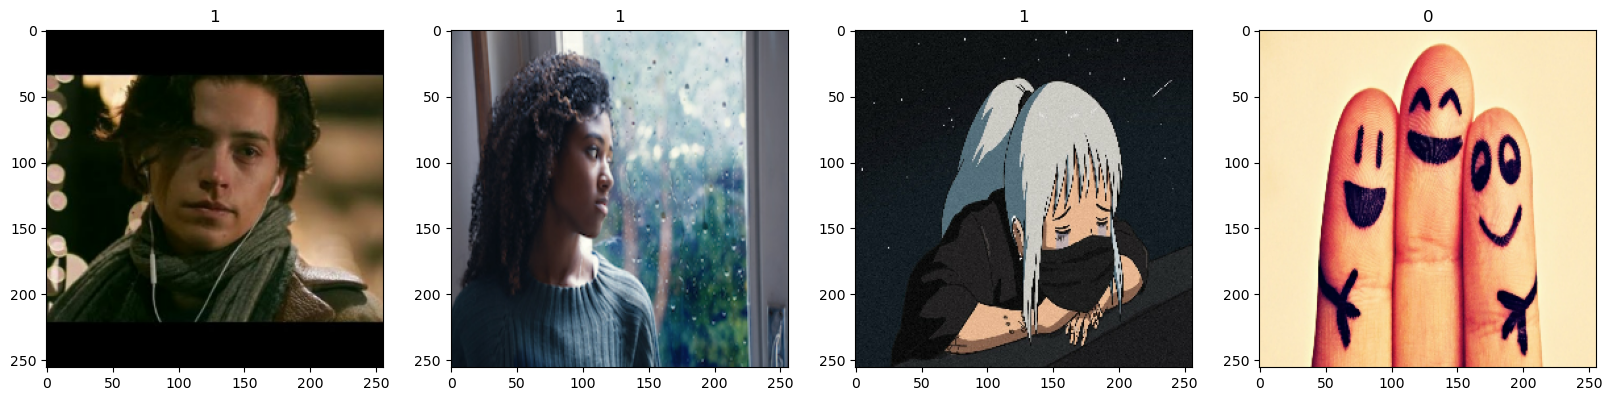

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess Data

In [40]:
data = data.map(lambda x,y: (x/255, y))

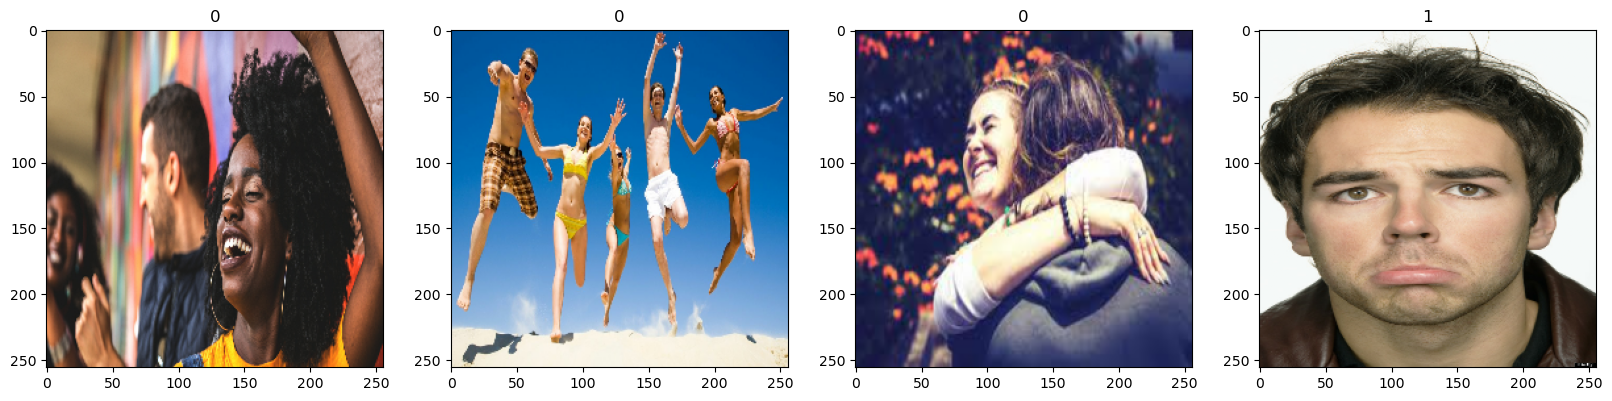

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [54]:
len(data)

6

In [51]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [56]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

4